# Machine Learning 1: House Price Prediction (1/3)

Data: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/data

![Machine-Learning Workflow](what-is-machine-learning.jpeg)

## Tasks 

#### Regression: Predict a float
 * Linear Regression
 * Support Vector Regression (SVR)
 * Gaussian Process Regression (GPR)
 * Logistic Regression: special case where the float is in [0..1]
 
#### Classification: Predict a Category
 * Two Categories:
     * Logistic Regression
     * Support Vector Machine (SVM)
 * Support Vector Machine (SVM) with probability estimation
 * Random Forest
 * Multinomial Logistic Regression
 
#### Unsuperivised: Structure the Data
 * Clustering
     * KMeans
     * Mixture Models (of Guassians, of Laplace, of Bernoulli, etc.)
 * Matrix Factorization: LDA, NMF
 * Dimensionality Reduction: PCA, FA

## Today's Task

 * Get started with Jupyter
 * Explore a dataset with house prices
 * Use some simple prediction techniques
 * Evaluate them

# Step 0: Imports

Basic numerics

In [1]:
import numpy as np

More advanced numerics

In [2]:
import scipy as sp

Linear Algebra (Matrix inverses, decompositions)

In [3]:
import scipy.linalg as la
# import numpy.linalg as la

Some basic statistics

In [4]:
import scipy.stats as stats

Basic Plotting

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

Advanced Plotting

In [6]:
import seaborn as sns

Data Access and Summary

In [7]:
import pandas as pd

In [ ]:
Scikit-Learn: http://scikit-learn.org/stable/documentation.html

# Step 1: Exploratory Data Analysis

In [9]:
train_data = pd.read_csv("train.csv")

In [10]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 1a: Look at the Target Distribution

Can access an individual field in the CSV as if the data-frame object were a map

In [14]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Summary statistics are misleading though: consider these four datasets (Anscombe's quartet) with the exact same means, standard deviations, correlation coefficients and linear fits
![Anscombe's Quartet](Anscombe.png)

To really understand something, plot it

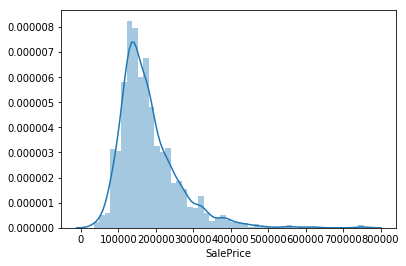

In [15]:
sns.distplot(train_data['SalePrice']);

Make it normal



## Step 1b: Find Useful Variables

 * **Numeric to Numeric**
     * Correlation
     * T-Test (but only if both at normally distributed
     
 * **Categorical to Numeric**
     * Chi-Squared Test if category is binary
     * ANOVA otherwise
     
 * **Numeric to Categorical **
     * ANOVA the other way
     
 * **Generic**
     * Mutual Information
     
Easiest approach

    1. Plot and have a look
    2. For regression, pretend features are all numbers and just use correlation

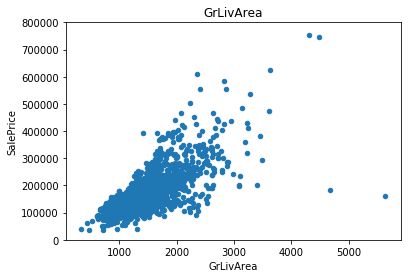

In [16]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title=var);



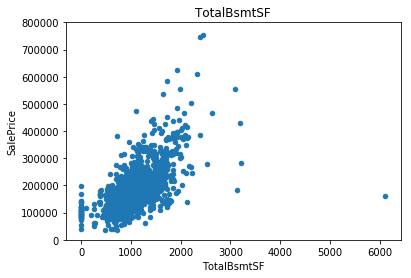

In [17]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title=var);



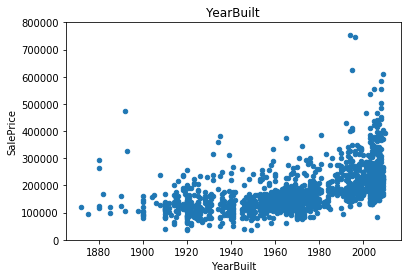

In [18]:
#scatter plot totalbsmtsf/saleprice
var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), title=var);



Try not to look too hard into this

![title](xkcd-corr.png)

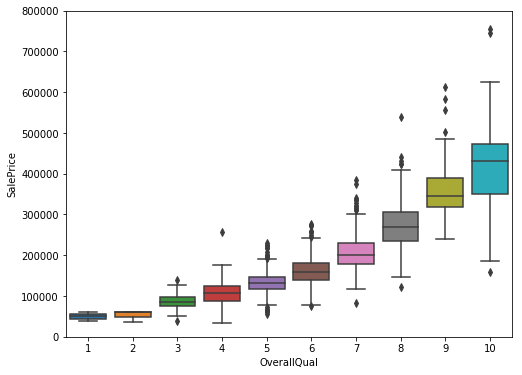

In [19]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

The box starts at the 25% percentile and goes to the 75% percentile. This is the inter-quartile range

The line in the box is the 50% percentile, i.e. the median

The lines outside the box are to $1.5 \times IQR$, or to the minmium maximum

The points outside the lines are outliers

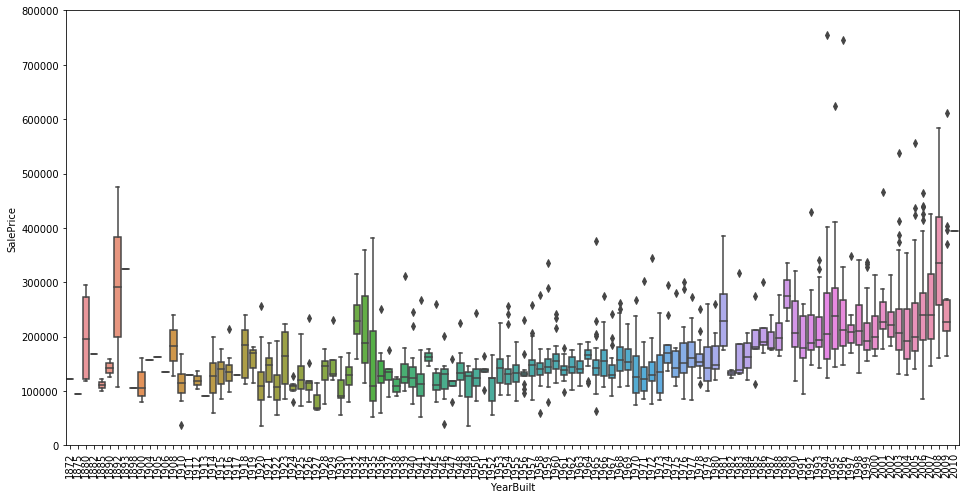

In [20]:


var = 'YearBuilt'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);



## A Quick Summary 

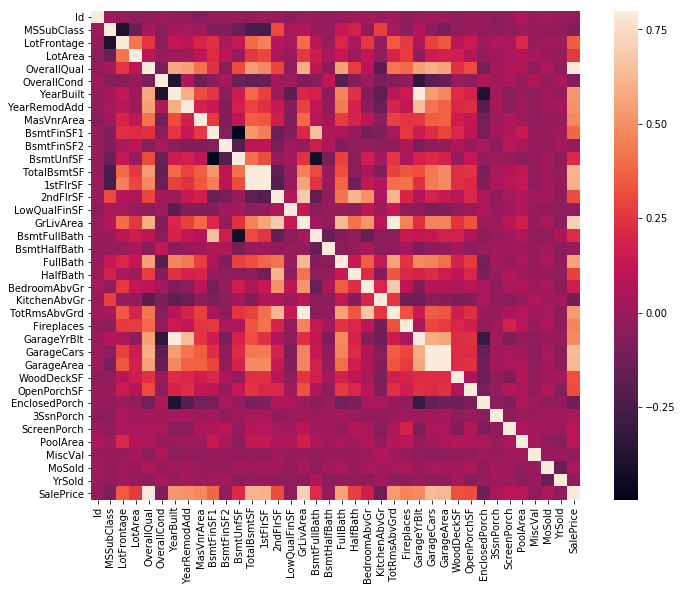

In [21]:


#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



Focus on Sales Price

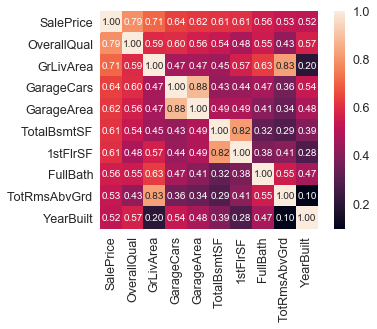

In [22]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


### Summary Results

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. We just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath' is apparently important!
* 'TotRmsAbvGrd' and 'GrLivArea' are both correlated with each other as well as sales price
* 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice', but might take work to adequately investigate


#### Moar plots!

It's always good to visualise

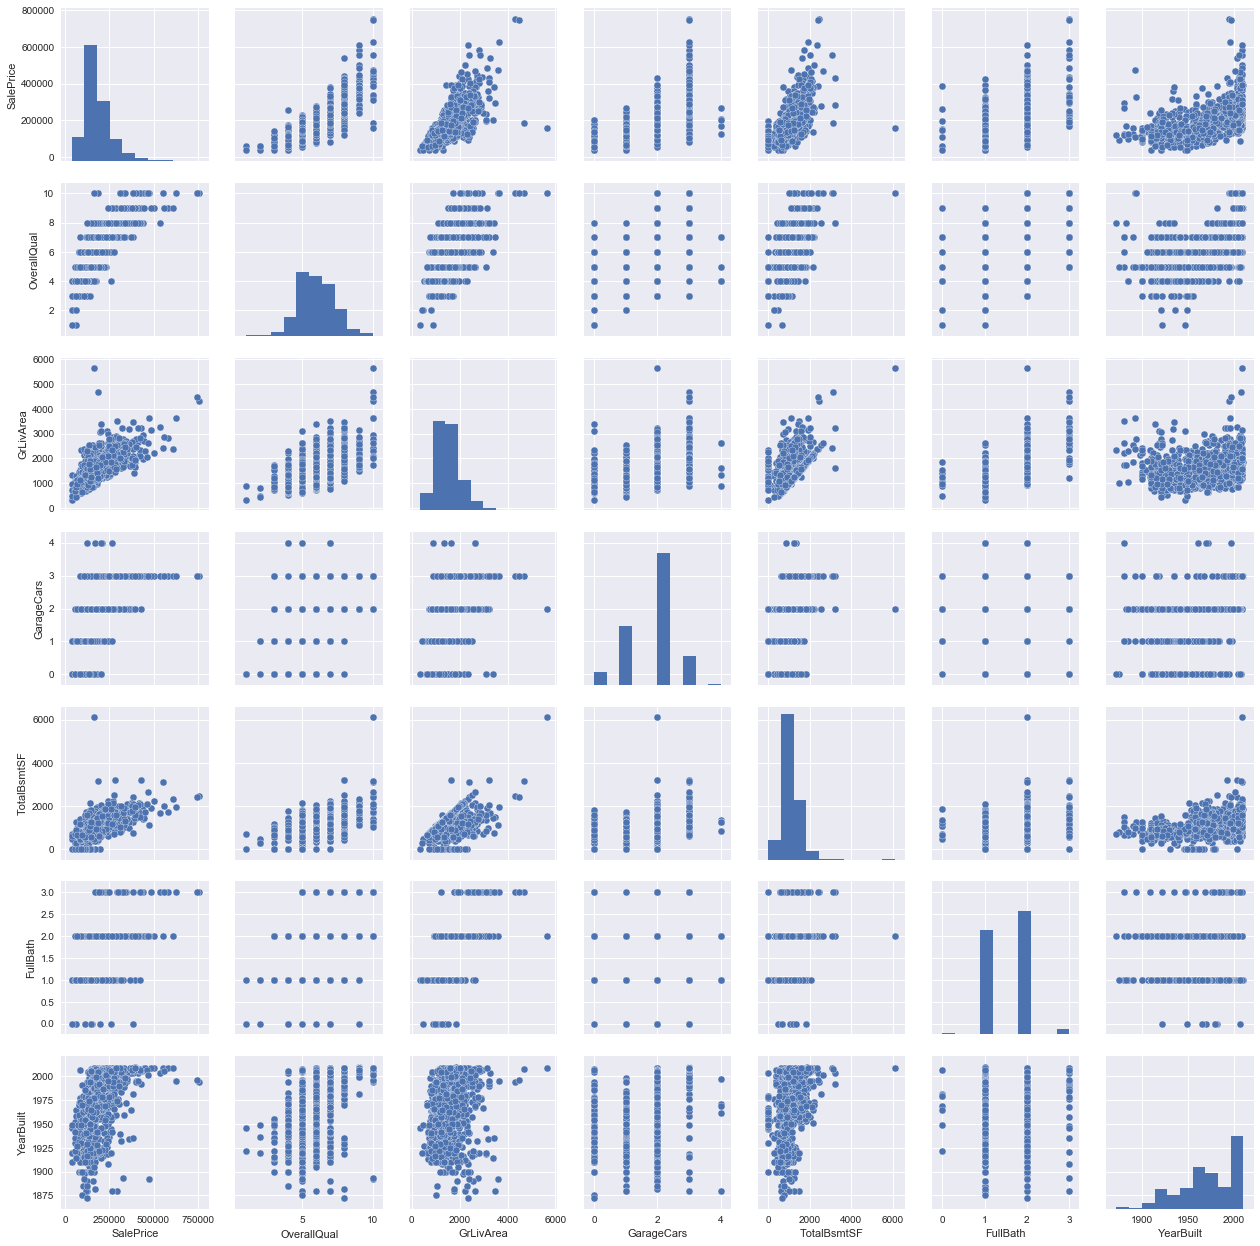

In [23]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], size = 2.5)
plt.show();

## Step 1c: Handle Missing Data

 * How much data is missing
 * Is it missing at random, or is there a pattern

In [24]:
total = train_data.isnull().sum().sort_values(ascending=False)

percent = (train_data.isnull().sum() 
           / train_data.isnull().count()
        ).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


* For columns with many missing values, delete the whole column
* For columns with few missing values, delete the individual missing-value rows

Observe that `GarageCars` has zero missing values, so we can just delete `GarageX`

In [25]:
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)

train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)

train_data.isnull().sum().max() #just checking that there's no missing data missing...

0

# Step 2: Model 

Use the scikit-learn cheatsheet to find a model: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Step 2a: Baseline Model - Linear Regression

![title](what-is-linear-regression.png)

$$ y = w_0 + w_1 x_1 + w_2 x_2 + .... + w_d x_d \qquad$$

$$ \qquad\qquad = w_0 x_0  + w_1 x_1 + w_2 x_2 + .... + w_d x_d, \qquad x_0 = 1$$

 * **Linearity**: A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain our data.
 * **No multicollinearity**: Predictor variables are not collinear, i.e., they aren't highly correlated. If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the model fit
 * **Zero conditional mean**: The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
 * **Homoskedasticity**: The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable; that is, there is no pattern in the residuals. In statistical jargon, the variance is constant.
 * **No autocorrelation** (serial correlation): Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.
 


## Step 2b: Further Feature Work - Make the data fit the model assumptions

Recall every unit change in a feature should result in a unit change in the predicted target. If the features have a skewed distribution, or the target has a skewed distribution, the idea of a single unit change breaks down.

The model will still fit, it just won't fit things very well.

This is what homoskedasticity means

#### Is the target normal?

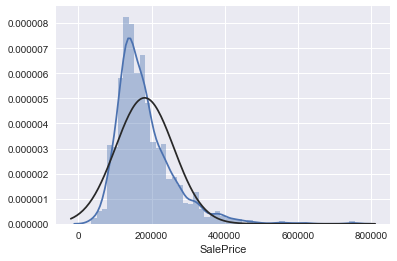

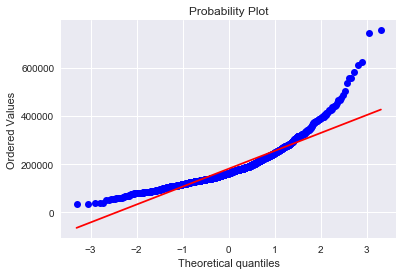

In [26]:


#histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=stats.norm);

fig = plt.figure()

res = stats.probplot(train_data['SalePrice'], plot=plt)

 

####  Log to the Rescue!

In [27]:
train_data_fix = train_data.copy()

In [28]:
train_data_fix['SalePrice'] = np.log(train_data['SalePrice'])

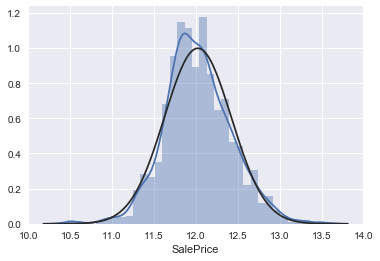

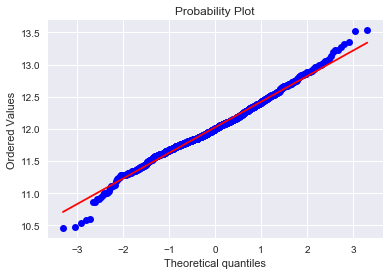

In [29]:
#histogram and normal probability plot
sns.distplot(train_data_fix['SalePrice'], fit=stats.norm);

fig = plt.figure()

res = stats.probplot(train_data_fix['SalePrice'], plot=plt)

Lets look at our features again

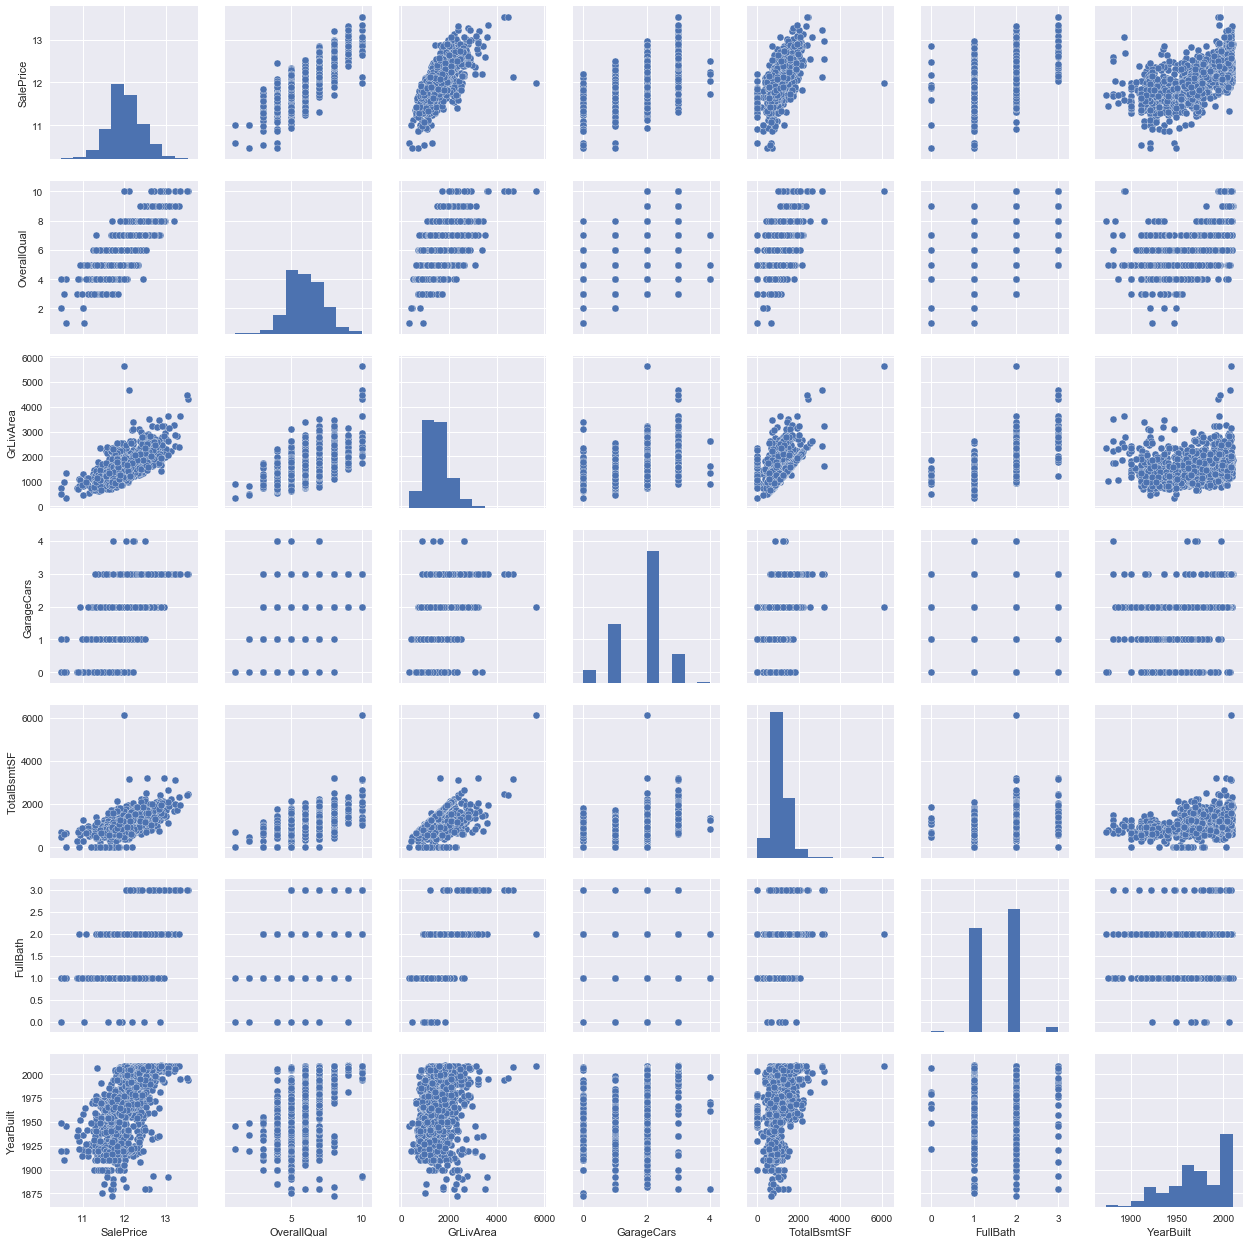

In [30]:
sns.set()
FinalCols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data_fix[FinalCols], size = 2.5)
plt.show();

Does a single unit change in the living area have a constant multiple change in the sales price?

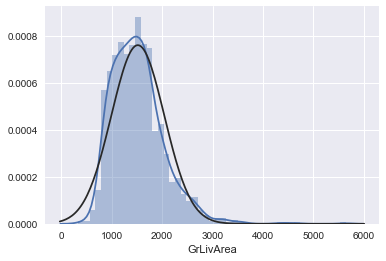

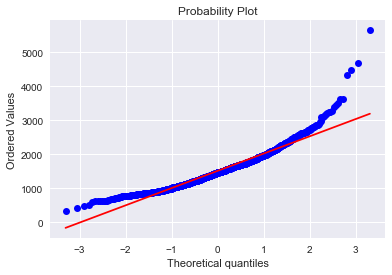

In [31]:
#histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=stats.norm);

fig = plt.figure()

res = stats.probplot(train_data['GrLivArea'], plot=plt)

In [32]:
train_data_fix['GrLivArea'] = np.log(train_data['GrLivArea'])

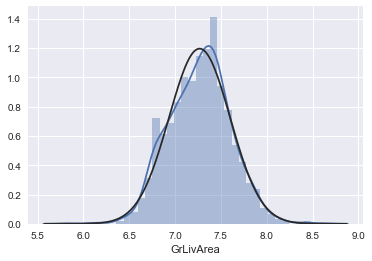

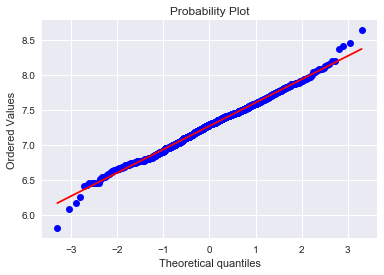

In [33]:
sns.distplot(train_data_fix['GrLivArea'], fit=stats.norm);

fig = plt.figure()

res = stats.probplot(train_data_fix['GrLivArea'], plot=plt)

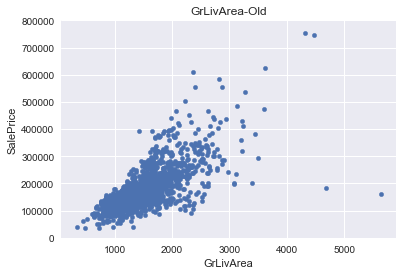

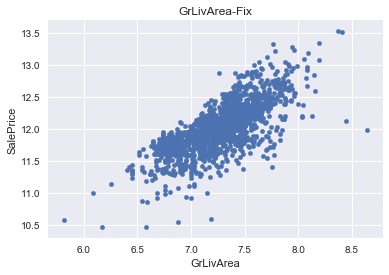

In [34]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'

data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', title="GrLivArea-Old", ylim=(0,800000));

data = pd.concat([train_data_fix['SalePrice'], train_data_fix[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', title="GrLivArea-Fix");



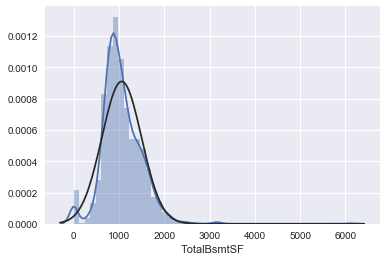

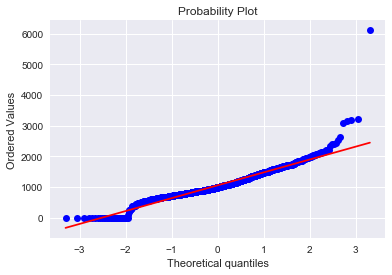

In [35]:
sns.distplot(train_data['TotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(train_data['TotalBsmtSF'], plot=plt)


In [36]:
train_data_fix['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data_fix['HasBsmt'] = 0 
train_data_fix.loc[ train_data['TotalBsmtSF']>0,'HasBsmt' ] = 1

In [37]:
train_data_fix.loc[train_data_fix['HasBsmt']==1,'TotalBsmtSF'] = np.log(
    train_data.loc[train_data_fix['HasBsmt']==1,'TotalBsmtSF']
)

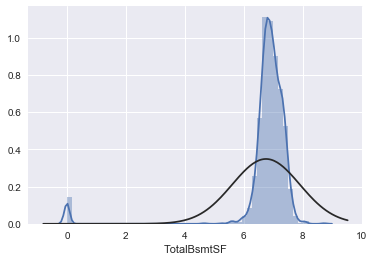

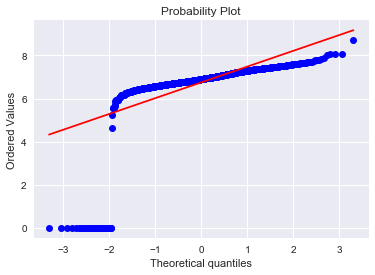

In [38]:
sns.distplot(train_data_fix['TotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(train_data_fix['TotalBsmtSF'], plot=plt)

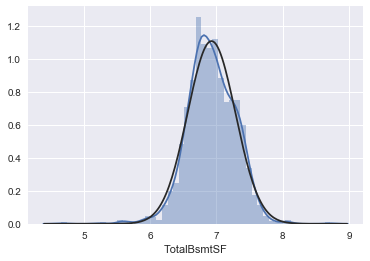

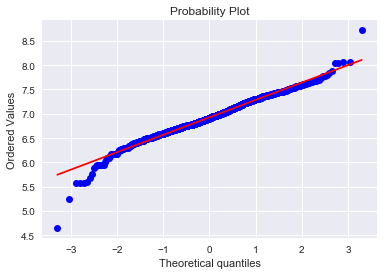

In [39]:
sns.distplot(train_data_fix[train_data_fix['TotalBsmtSF']>0]['TotalBsmtSF'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(train_data_fix[train_data_fix['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

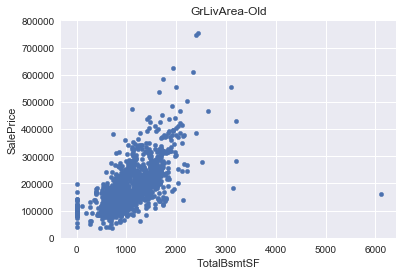

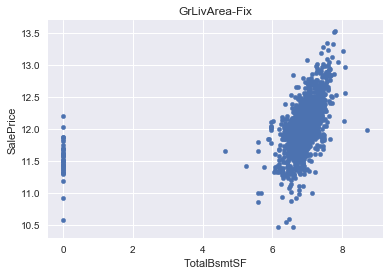

In [40]:
#scatter plot grlivarea/saleprice
var = 'TotalBsmtSF'

data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', title="GrLivArea-Old", ylim=(0,800000));

data = pd.concat([train_data_fix['SalePrice'], train_data_fix[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', title="GrLivArea-Fix");

## Step 2c: Outliers 

*Some things just can't be accounted for*

In [41]:
saleprice_scaled = StandardScaler().fit_transform(train_data_fix['SalePrice'][:,np.newaxis]);

low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-3.91487881]
 [-3.88556939]
 [-3.7084352 ]
 [-3.61762724]
 [-3.57342933]
 [-2.91661859]
 [-2.89266214]
 [-2.7762025 ]
 [-2.7762025 ]
 [-2.73140737]]

outer range (high) of the distribution:
[[2.67330464]
 [2.7587379 ]
 [2.9329346 ]
 [3.01081521]
 [3.01793647]
 [3.13374403]
 [3.25415757]
 [3.30818156]
 [3.74786551]
 [3.78124508]]


In [42]:
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Ex,TA,PConc,5644,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,2,1418,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,2260,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,3,884,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750


In [43]:
train_data = train_data_fix.drop(train_data_fix[train_data_fix['Id'] == 1299].index)
train_data = train_data_fix.drop(train_data_fix[train_data_fix['Id'] == 524].index)

## Step 2d: Convert our dataset to a Matrix

Given a row

 1. Each numeric variable is a single column in a vector 
     * e.g. `a : Float = 23  => [23]`
 2. Each n-way categorical variable is n-columns in the vector: 
     * `a : [0..5] = 2 => [0, 0, 1, 0, 0, 0]`
 3. For text
     1. Build a dictionary of all $T$ words
     2. Treat each word as a categorical
     3. Sum them all up
     4. If document length is unimportant, divide by the word-count to get frequencies
     5. Scikit learn does all of this automatically with `CountVectorizer` and `TfIdfVectorizer`
 4. Add an intercept
 5. Concatenate it all together into one vector
 6. Repeate for all documents, then concatenate the vectors into one matrix

In [44]:
FinalCols + ["Neighborhood"]

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'Neighborhood']

In [45]:
train_data_final = train_data_fix[FinalCols + ["Neighborhood"]]

In [46]:
train_data_final.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Neighborhood
0,12.247694,7,7.444249,2,6.752270,2,2003,CollgCr
1,12.109011,6,7.140453,2,7.140453,2,1976,Veenker
2,12.317167,7,7.487734,2,6.824374,2,2001,CollgCr
3,11.849398,7,7.448334,3,6.628041,1,1915,Crawfor
4,12.429216,8,7.695303,3,7.043160,2,2000,NoRidge


In [47]:
train_data_final = pd.get_dummies(train_data_final)

In [48]:
train_data_final.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,12.247694,7,7.444249,2,6.752270,2,2003,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.109011,6,7.140453,2,7.140453,2,1976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.317167,7,7.487734,2,6.824374,2,2001,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11.849398,7,7.448334,3,6.628041,1,1915,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12.429216,8,7.695303,3,7.043160,2,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [49]:
train_data_final = train_data_fix[FinalCols]

And we're done!

## Step 2e: Train and Evaluate the Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
train_data_final.shape

(1459, 7)

In [52]:
X_train, y_train = train_data_final.iloc[0:1000, 1:], train_data_final.iloc[0:1000,0]
X_test,  y_test  = train_data_final.iloc[1000:, 1:], train_data_final.iloc[1000:,0]

In [53]:
linear_model = LinearRegression(fit_intercept=True, normalize=True)

In [54]:
linear_model.fit(X_train, y_train)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [55]:
linear_model.score(X_test, y_test)

0.8005455403853488

Coefficients: 
 [ 0.100638    0.49781679  0.07799051  0.03538946 -0.02418489  0.00279129]
Root Mean squared error: 38028.97
Variance score: 0.76


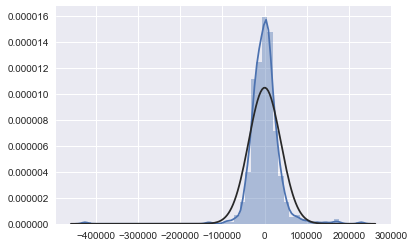

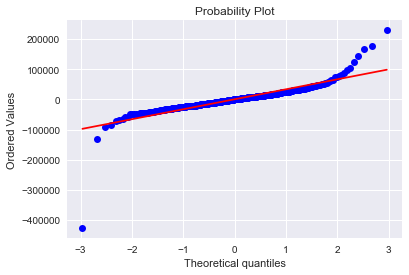

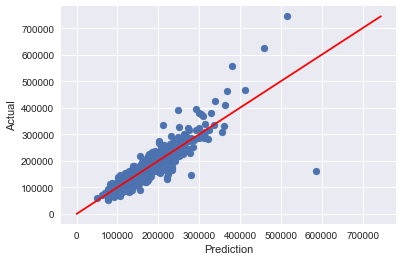

In [70]:
# Make predictions using the testing set
def predict_and_exp_and_measure(model, X_test, y_test, apply_exp_to_pred=False):
    def do_exp(x):
        if apply_exp:
            return np.exp(x)
        else:
            return x
    
    pred = model.predict(X_test)
    if apply_exp_to_pred:
        pred = np.exp(pred)

    # The coefficients
    print('Coefficients: \n', linear_model.coef_)

    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(mean_squared_error(y_test, pred)))

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, pred))

    res = [e - p for p,e in zip(pred, y_test)]

    sns.distplot(res, fit=stats.norm);
    
    plt.figure()
    res = stats.probplot(res, plot=plt)
    
    plt.figure()
    plt.scatter (pred, y_test)
    plt.plot([0,max(y_test)], [0, max(y_test)], "r-")
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    
predict_and_exp_and_measure(linear_model, X_test, np.exp(y_test), apply_exp_to_pred=True)

### Using a Fancier Model

In [71]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [72]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

Coefficients: 
 [ 0.100638    0.49781679  0.07799051  0.03538946 -0.02418489  0.00279129]
Root Mean squared error: 29501.03
Variance score: 0.86


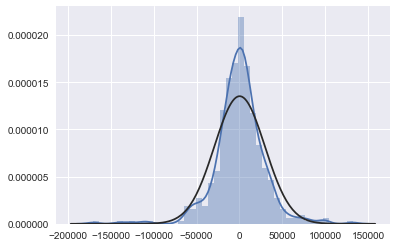

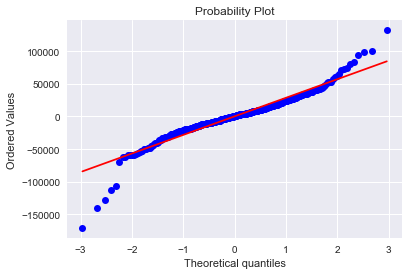

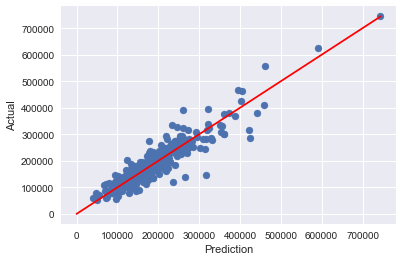

In [73]:
predict_and_exp_and_measure(clf, X_test, np.exp(y_test), apply_exp_to_pred=True)

### Using a Fancier Model without Feature Engineering

In [74]:
train_data_final = train_data[FinalCols]

X_train, y_train = train_data_final.iloc[0:1000, 1:], train_data_final.iloc[0:1000,0]
X_test,  y_test  = train_data_final.iloc[1000:, 1:], train_data_final.iloc[1000:,0]

In [75]:
clf.fit(X_train, np.exp(y_train))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

Coefficients: 
 [ 0.100638    0.49781679  0.07799051  0.03538946 -0.02418489  0.00279129]
Root Mean squared error: 35857.96
Variance score: 0.79


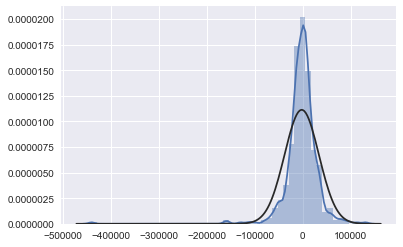

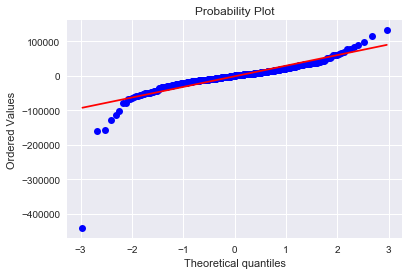

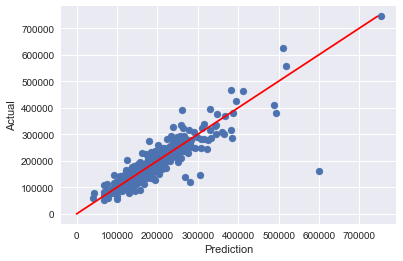

In [76]:
predict_and_exp_and_measure(clf, X_test, np.exp(y_test), apply_exp_to_pred=False)